In [1]:
# -*- encoding:utf8 -*-
import pandas as pd
import numpy as np
import konlpy
import sys
if sys.version_info <= (2,7):
    reload(sys)
    sys.setdefaultencoding('utf-8')
from konlpy.tag import Kkma, Okt, Hannanum
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
kkma = Kkma()
okt = Okt()
hannanum = Hannanum()
%matplotlib inline

In [2]:
poems = pd.read_csv('poems_last.csv',header=0,encoding='CP949',error_bad_lines=False)
poems
# 총 데이터수 6591개

,시인 이름,"성별(남1,여0)",시
0,김병래,1.0,뿔\n?????? 김 병 래\n?\n뿔은 짐승에게만\n있는 것이 아니다\n?\n사람...
1,김관형,1.0,"<font color=""gray"">\n\n\n\n꿈의 보람\n송암 \n\n?\n진실..."
2,채영선,0.0,"<font color=""gray""> \n \n 미안해 / 소담 \..."
3,문재학,1.0,진눈깨비의 비애(悲哀)\n소산/문 재학\n\n\n젖어서 슬픈 미련의 진눈깨비\n사랑...
4,이기호,1.0,"<font color=""gray"">?\n?\n\n늘 좋은 생각\n? \n서당 \n..."
5,이기호,1.0,"<font color=""gray"">?\n?\n\n배움\n? \n서당 \n? \n우..."
6,김병래,1.0,세월\n??? 김 병 래\n?\n해질무렵\n옆집 83살의 할머니가\n15년이 다 된...
7,이규석,1.0,?\n?\n\n어느 \n시인(詩人)의 독백\n?????????????????????...
8,김사빈,0.0,?\n설렘이 없는지 오래이다 \n두군 거림이 없는지도 오래다 \n설렘이면 무죄이고 ...
9,문재학,1.0,\n\n정초의 보름달\n소산/문 재학\n\n\n우주의 어둠을 걷어내는\n위대한 자연...


(<matplotlib.axes._subplots.AxesSubplot at 0x189965a7278>, 6223)

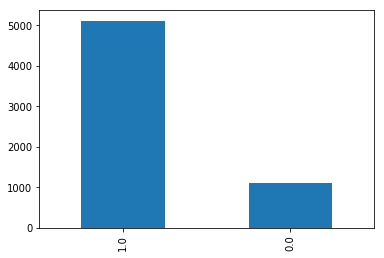

In [3]:
poems['성별(남1,여0)'].value_counts().plot(kind='bar'), len(poems)
# 남성시인 데이터가 훨씬 많다 ㅠ

In [4]:
train_data = poems.drop(['성별(남1,여0)'],axis=1)
target_data = poems[['성별(남1,여0)']]
train_data = train_data.replace('\\n','',regex=True)
train_data = train_data.replace('\?','',regex=True)
train_data = train_data.replace('<font color="gray">','',regex=True)
train_data = train_data.replace('</font>','',regex=True)
train_data  = train_data.replace('&amp;nb','',regex=True)
train_data  = train_data.replace('&amp;n','',regex=True)
train_data  = train_data.replace('\...','',regex=True)
train_data  = train_data.replace(['\(','\)'],'',regex=True)
train_data

,시인 이름,시
0,김병래,뿔 김 병 래뿔은 짐승에게만있는 것이 아니다사람에게도 있다신종코로나로마스크 값이하늘...
1,김관형,꿈의 보람송암 진실한 꿈의 보람은삶이 활짝 피운 이룸의 꽃이다세월 갈피에 우쭐한 모...
2,채영선,미안해 / 소담 미안해 이파리가 많아서 ...
3,문재학,진눈깨비의 비애悲哀소산/문 재학젖어서 슬픈 미련의 진눈깨비사랑 잃은 길 위에 질척거...
4,이기호,늘 좋은 생각 서당 우리는 삶의 늘 좋은 생각을 갖고자신의 행복을 추구하며 살자...
5,이기호,배움 서당 우리의 1년은 세계의 10년과 같다해방 후 반세기가 격동의 연속사회변...
6,김병래,세월 김 병 래해질무렵옆집 83살의 할머니가15년이 다 된 애완견을데리고 산보를 한...
7,이규석,어느 시인詩人의 독백가시고기의 일생
8,김사빈,설렘이 없는지 오래이다 두군 거림이 없는지도 오래다 설렘이면 무죄이고 두군 거림이 ...
9,문재학,정초의 보름달소산/문 재학우주의 어둠을 걷어내는위대한 자연의 섭리만고불변萬古不變의 ...


In [5]:
target_data.isnull().sum(), train_data.isnull().sum()
# 성별(label)값에 4개가 Nan임!

(성별(남1,여0)    4
 dtype: int64, 시인 이름    0
 시        0
 dtype: int64)

In [6]:
target_data['성별(남1,여0)'] = target_data['성별(남1,여0)'].fillna(0)
target_data.isnull().sum()

C:\Users\zebra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


성별(남1,여0)    0
dtype: int64

In [7]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를',
             '으로','자','에','와','한','하다']
# stopwords = 불용어
poem_X = okt.morphs(train_data['시'][0],stem=True)
poem_X
# 첫번째 시 '뿔' 테스트

['뿔',
 '김',
 '병',
 '래',
 '뿔',
 '은',
 '짐승',
 '에게만',
 '있다',
 '것',
 '이',
 '아니다',
 '사람',
 '에게도',
 '있다',
 '신종',
 '코로나',
 '로',
 '마스크',
 '값',
 '이하늘',
 '높이',
 '치솟다',
 '사람',
 '들',
 '눈',
 '에',
 '붉다',
 '뿔',
 '이',
 '돋아나다',
 '보이지',
 '않다',
 '만지다',
 '수',
 '없다',
 '뿔',
 '이지만',
 '탱자나무',
 '가시',
 '보다',
 '더',
 '무섭다',
 '예리하다',
 '붉다',
 '뿔',
 '이다']

In [8]:
matrix=[]
for poem in train_data['시']:
    poem_X = []
    poem_X = okt.morphs(poem, stem=True)
    poem_X = [word for word in poem_X if not word in stopwords]
    matrix.append(poem_X)
matrix[0]

['뿔',
 '김',
 '병',
 '래',
 '뿔',
 '짐승',
 '에게만',
 '있다',
 '것',
 '아니다',
 '사람',
 '에게도',
 '있다',
 '신종',
 '코로나',
 '로',
 '마스크',
 '값',
 '이하늘',
 '높이',
 '치솟다',
 '사람',
 '눈',
 '붉다',
 '뿔',
 '돋아나다',
 '보이지',
 '않다',
 '만지다',
 '수',
 '없다',
 '뿔',
 '이지만',
 '탱자나무',
 '가시',
 '보다',
 '더',
 '무섭다',
 '예리하다',
 '붉다',
 '뿔',
 '이다']

In [9]:
matrix[7]

['어느', '시인', '詩人', '독백', '가시고기', '일생']

In [10]:
matrix = [x for x in matrix if str(x) !='nan']

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 35000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(matrix)
sequences = tokenizer.texts_to_sequences(matrix)
sequences[1]

[68,
 1370,
 171,
 2947,
 68,
 1370,
 54,
 663,
 274,
 363,
 5,
 20,
 46,
 1281,
 8268,
 136,
 52,
 1627,
 425,
 2948,
 20,
 418,
 1,
 1927,
 571,
 932,
 1928,
 2548,
 20,
 68,
 1,
 1929,
 1697,
 3792,
 2949,
 120,
 2389,
 480,
 274,
 1370,
 20,
 1503,
 6624]

In [12]:
X_data = sequences
print('시의 최대 길이:',max(len(l) for l in X_data))
print('시의 평균 길이:',sum(map(len,X_data))/len(X_data))

시의 최대 길이: 67
시의 평균 길이: 38.34758155230596


In [13]:
max_len = 67
# 전체 데이터 셋 길이를 67로 맞추기 위해 패딩
data = pad_sequences(X_data,maxlen=max_len)
data.shape

(6223, 67)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data,target_data,test_size=0.2)
x_train[1]
# TRAIN_TEST_SPLIT

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,  2957,    53,    84,     2,    49,
          85,  3888,   336,   442,   275,  2226,  1284,    19,   919,
        2957,    53,  5806, 13160,     1,  4007,   353,    30,  1154,
        2609,     1,   348,  8591,  5727,  1237,    71,    16,   998,
        1132,   779,  7177, 13161,   436,   186,    11,   345,    39,
        1397,    82,   673,   934])

In [15]:
x_train = np.array(list(x for x in x_train))
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# 혹시 모르니 np.array로!
x_train[0:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,   145,   618,   435,
          479,   546,   227,   140],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,  2957,    53,    84,     2,    49,
           85,  3888,   336,   442,   275,  2226,  1284,    19,   919,
         2957,    53,  5806, 13160,     1,  4007,   353,    30,  1154,
         2609,     1,   348,  8591,  5727,  1237,    71,    16,   998,
         1132,   779,  7177, 13161,   43

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

print('training set accuracy:',tree.score(x_train, y_train))
print('test set accuracy:',tree.score(x_test,y_test))

prediction_by_tree = tree.predict(x_test)
prediction_by_tree
# train set accuracy 가 1.0이 나오는 이유는?

training set accuracy: 0.9997991161108879
test set accuracy: 0.7349397590361446


array([1., 0., 1., ..., 1., 1., 0.])

# RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
forest.fit(x_train,y_train)

print('training set accuracy:',forest.score(x_train,y_train))
print('test set accuracy:',forest.score(x_test,y_test))

prediction_by_forest = forest.predict(x_test)
prediction_by_forest

C:\Users\zebra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


training set accuracy: 0.9925672961028525
test set accuracy: 0.8120481927710843


array([1., 0., 1., ..., 1., 1., 1.])

In [19]:
from tensorflow.keras.layers import SimpleRNN,Embedding,Dense
from tensorflow.keras.models import Sequential

In [22]:
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index)+1
model = Sequential()
model.add(Embedding(vocab_size,32)) # 임베딩 벡터의 차원 32
model.add(SimpleRNN(32)) # hidden_size 32
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=3,batch_size=64,validation_split=0.2)
# 함수 = sigmoid, 손실함수 = binary_crossentropy, validation split = 0.2

Train on 3982 samples, validate on 996 samples
Epoch 1/3
3982/3982 [==============================] - 4s 972us/sample - loss: 0.4899 - acc: 0.8059 - val_loss: 0.4692 - val_acc: 0.8153
Epoch 2/3
3982/3982 [==============================] - 2s 489us/sample - loss: 0.3841 - acc: 0.8370 - val_loss: 0.4589 - val_acc: 0.8173
Epoch 3/3
3982/3982 [==============================] - 2s 501us/sample - loss: 0.2338 - acc: 0.9242 - val_loss: 0.5136 - val_acc: 0.7841


In [23]:
model.evaluate(x_test,y_test)[1]
# 1의 의미가 뭘까

1245/1245 [==============================] - 0s 195us/sample - loss: 0.4771 - acc: 0.8024


0.80240965

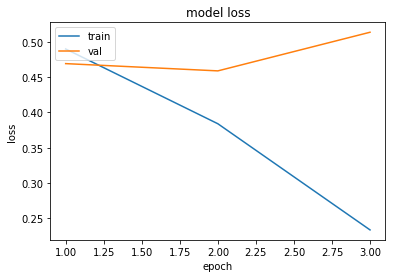

In [24]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# loss가 마이너스로 가는이유